In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

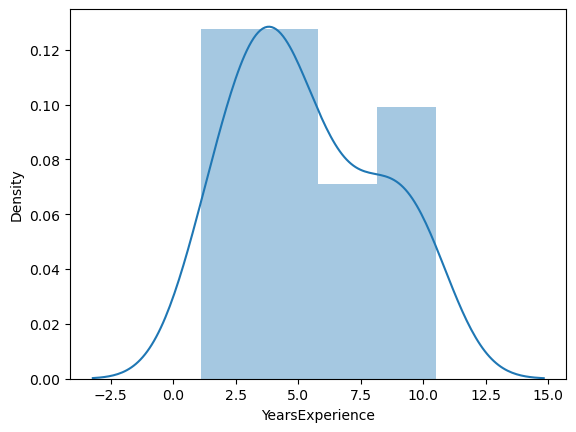

In [5]:
sns.distplot(dataset['YearsExperience'])

C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

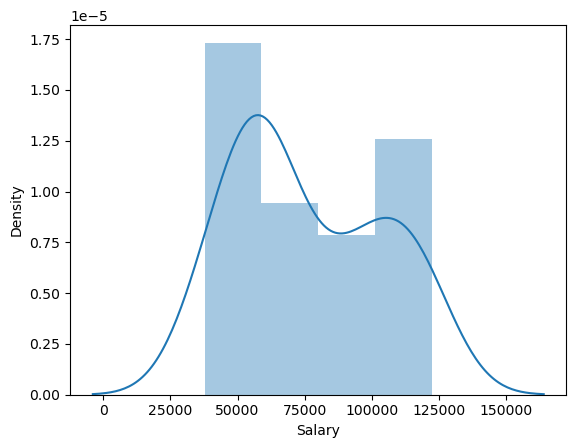

In [6]:
sns.distplot(dataset['Salary'])

# Correlation Analysis

In [7]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

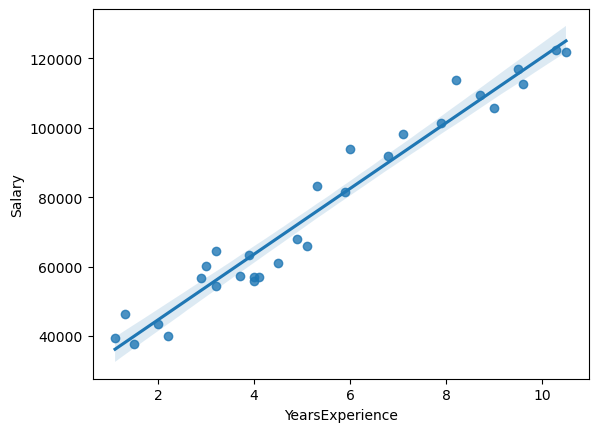

In [8]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

# Model Building

In [9]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

# Model Testing

In [10]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [12]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [13]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [14]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [15]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [16]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [17]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# Transformation

# 1. Square Root 

In [20]:
dataset_sqr_ex=np.sqrt(dataset["YearsExperience"])
dataset_sqr_ex

0     1.048809
1     1.140175
2     1.224745
3     1.414214
4     1.483240
5     1.702939
6     1.732051
7     1.788854
8     1.788854
9     1.923538
10    1.974842
11    2.000000
12    2.000000
13    2.024846
14    2.121320
15    2.213594
16    2.258318
17    2.302173
18    2.428992
19    2.449490
20    2.607681
21    2.664583
22    2.810694
23    2.863564
24    2.949576
25    3.000000
26    3.082207
27    3.098387
28    3.209361
29    3.240370
Name: YearsExperience, dtype: float64

In [22]:
dataset_sqr_sal=np.sqrt(dataset["Salary"])
dataset_sqr_sal

0     198.350700
1     214.953483
2     194.244691
3     208.626460
4     199.727314
5     237.995798
6     245.254969
7     233.334524
8     253.860198
9     239.142217
10    251.431899
11    236.207536
12    238.656657
13    238.916303
14    247.206392
15    260.649190
16    256.961087
17    288.249892
18    285.242003
19    306.496330
20    302.882816
21    313.485247
22    318.279751
23    337.360341
24    330.803567
25    324.933839
26    342.007310
27    335.611382
28    349.844251
29    349.101704
Name: Salary, dtype: float64

In [25]:
dataset_sqr=pd.DataFrame(data=(dataset_sqr_ex,dataset_sqr_sal)).T
dataset_sqr

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314
5,1.702939,237.995798
6,1.732051,245.254969
7,1.788854,233.334524
8,1.788854,253.860198
9,1.923538,239.142217


C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

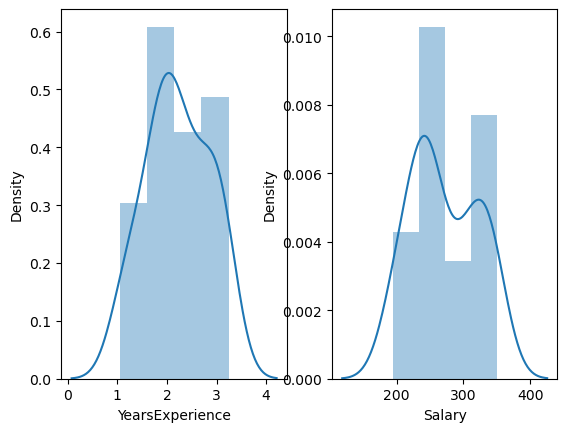

In [26]:
plt.subplot(1,2,1)
sns.distplot(dataset_sqr_ex)
plt.subplot(1,2,2)
sns.distplot(dataset_sqr_sal)

In [28]:
model_sqr=smf.ols("Salary~YearsExperience",data=dataset_sqr).fit()
model_sqr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 12 May 2023   Prob (F-statistic):           7.58e-19
Time:                        16:15:15   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         103.5680      8.178     12.663      0.000      86.815     120.321
YearsExperience    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model_sqr.rsquared

0.9419490138976825

In [30]:
model_sqr.rsquared_adj

0.9398757643940283

# 2. Log Transformation 

In [32]:
dataset_log_exp=np.log(dataset["YearsExperience"])
dataset_log_exp

0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: YearsExperience, dtype: float64

In [34]:
dataset_log_sal=np.log(dataset["Salary"])
dataset_log_sal

0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: Salary, dtype: float64

In [36]:
dataset_log=pd.DataFrame(data=(dataset_log_exp,dataset_log_sal)).T
dataset_log

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

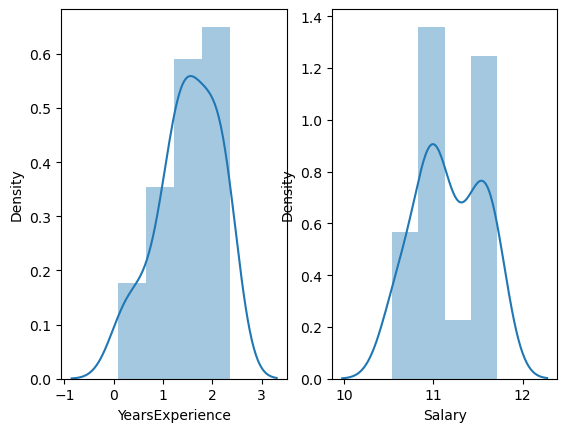

In [40]:
plt.subplot(1,2,1)
sns.distplot(dataset_log_exp)
plt.subplot(1,2,2)
sns.distplot(dataset_log_sal)

In [41]:
dataset_log.skew()

YearsExperience   -0.600565
Salary            -0.044126
dtype: float64

In [45]:
model_log=smf.ols("Salary~YearsExperience",data=dataset_log).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 12 May 2023   Prob (F-statistic):           7.40e-16
Time:                        16:38:35   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model_log.rsquared,model_log.rsquared_adj

(0.9052150725817149, 0.9018298966024904)

# 3. Expoential Transformation

In [62]:
dataset_expo_ex=np.exp(dataset["YearsExperience"])
dataset_expo_ex

0         3.004166
1         3.669297
2         4.481689
3         7.389056
4         9.025013
5        18.174145
6        20.085537
7        24.532530
8        24.532530
9        40.447304
10       49.402449
11       54.598150
12       54.598150
13       60.340288
14       90.017131
15      134.289780
16      164.021907
17      200.336810
18      365.037468
19      403.428793
20      897.847292
21     1211.967074
22     2697.282328
23     3640.950307
24     6002.912217
25     8103.083928
26    13359.726830
27    14764.781566
28    29732.618853
29    36315.502674
Name: YearsExperience, dtype: float64

C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

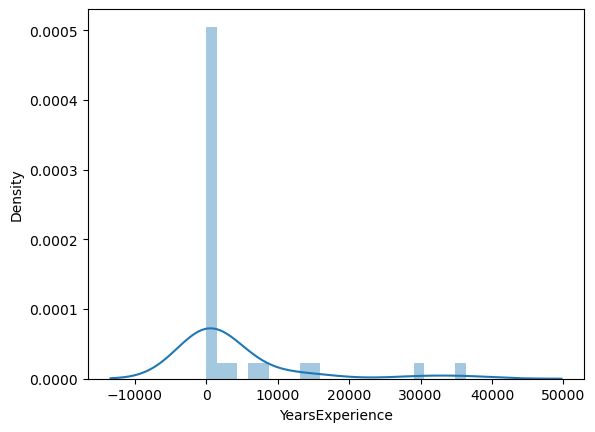

In [63]:
sns.distplot(dataset_expo_ex)

In [64]:
dataset_expo=pd.DataFrame(data=(dataset_expo_ex,dataset["Salary"])).T
dataset_expo

,YearsExperience,Salary
0,3.004166,39343.0
1,3.669297,46205.0
2,4.481689,37731.0
3,7.389056,43525.0
4,9.025013,39891.0
5,18.174145,56642.0
6,20.085537,60150.0
7,24.532530,54445.0
8,24.532530,64445.0
9,40.447304,57189.0


In [60]:
model_expo=smf.ols(("YearsExperience~Salary"),data=dataset_expo).fit()
model_expo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.72e-05
Time:                        17:09:52   Log-Likelihood:                -305.02
No. Observations:                  30   AIC:                             614.0
Df Residuals:                      28   BIC:                             616.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.286e+04   3561.833     -3.610      0.001   -2.02e+04   -5563.345
Salary         0.2211      0.044      5.007      0.000       0.131       0.312
==============================================================================
Omnibus:                       21.098   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.921
Skew:                           1.661   Prob(JB):                     1.17e-07
Kurtosis:                       6.808   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion 

In [61]:
# 1.p<0.05 then the model is accpected
# 2.when the experience increases then salary will increases linearly